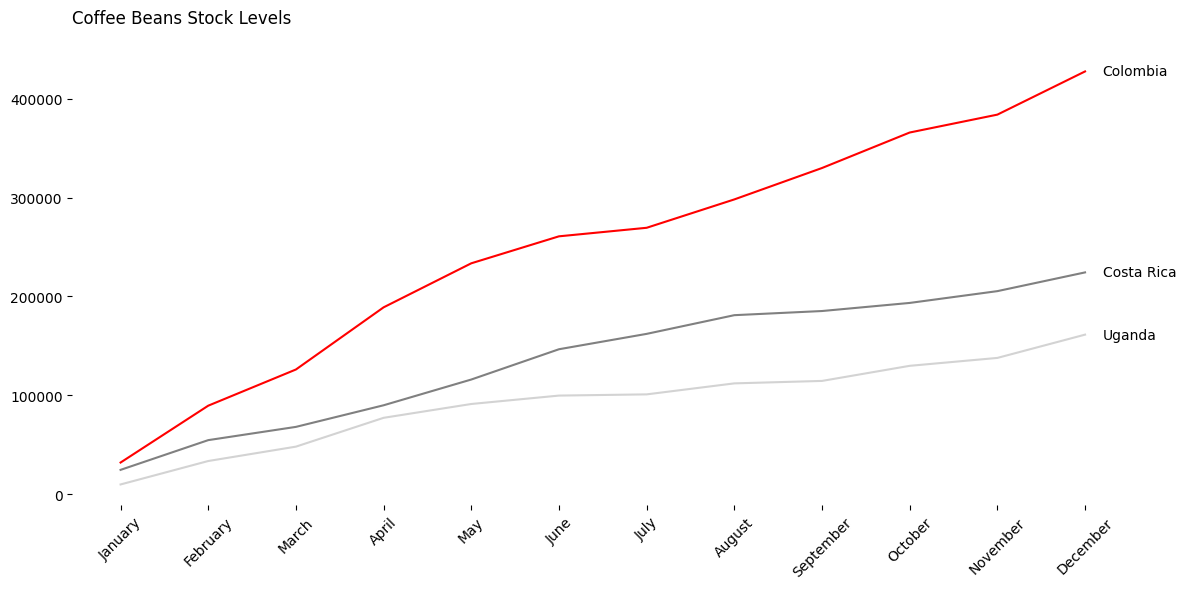

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

#BEANS
# Define the months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

# Data for Coffee Beans (COO Costa Rica)
costa_rica_data = {
    'Month': months,
    'NetQuantity': [24647, 30076, 13399, 21858, 26044, 30627, 
                    15548, 18910, 4194, 8192, 11928, 18949]
}

# Data for Coffee Beans (COO Uganda)
uganda_data = {
    'Month': months,
    'NetQuantity': [9887, 23710, 14539, 29154, 17349 - 3360, 8497, 
                    1226, 11126, 2477, 15276, 7993, 23547]
}

# Data for Coffee Beans (COO Colombia)
colombia_data = {
    'Month': months,
    'NetQuantity': [32057, 57513, 36599, 62871, 46222 - 1680, 27284, 
                    8629, 28697, 31765, 35901, 18094, 43694]
}

# Create DataFrames for each coffee bean type
df_costa_rica = pd.DataFrame(costa_rica_data)
df_uganda = pd.DataFrame(uganda_data)
df_colombia = pd.DataFrame(colombia_data)

# Calculate cumulative stock levels
df_costa_rica['StockLevel'] = df_costa_rica['NetQuantity'].cumsum()
df_uganda['StockLevel'] = df_uganda['NetQuantity'].cumsum()
df_colombia['StockLevel'] = df_colombia['NetQuantity'].cumsum()

# Plot the stock levels
plt.figure(figsize=(12, 6))

# Plot lines for each country with specific colors
plt.plot(df_costa_rica['Month'], df_costa_rica['StockLevel'], color='grey', label='Costa Rica')  # Серый оттенок
plt.plot(df_uganda['Month'], df_uganda['StockLevel'], color='lightgrey', label='Uganda')  # Светло-серый оттенок
plt.plot(df_colombia['Month'], df_colombia['StockLevel'], color='red', label='Colombia')  # Красный цвет

# Remove label for the x-axis (month)
plt.xlabel('')

plt.ylabel('')  # Removed label for the y-axis

# Set a shorter title in the top left corner
plt.title('Coffee Beans Stock Levels', loc='left', pad=20)

# Rotate x-axis labels and keep them visible
plt.xticks(rotation=45)

# Remove the box (spines) around the plot
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Add country labels to the end of each line
plt.text(11.2, df_costa_rica['StockLevel'].iloc[-1], 'Costa Rica', va='center')
plt.text(11.2, df_uganda['StockLevel'].iloc[-1], 'Uganda', va='center')
plt.text(11.2, df_colombia['StockLevel'].iloc[-1], 'Colombia', va='center')

plt.tight_layout()
plt.show()


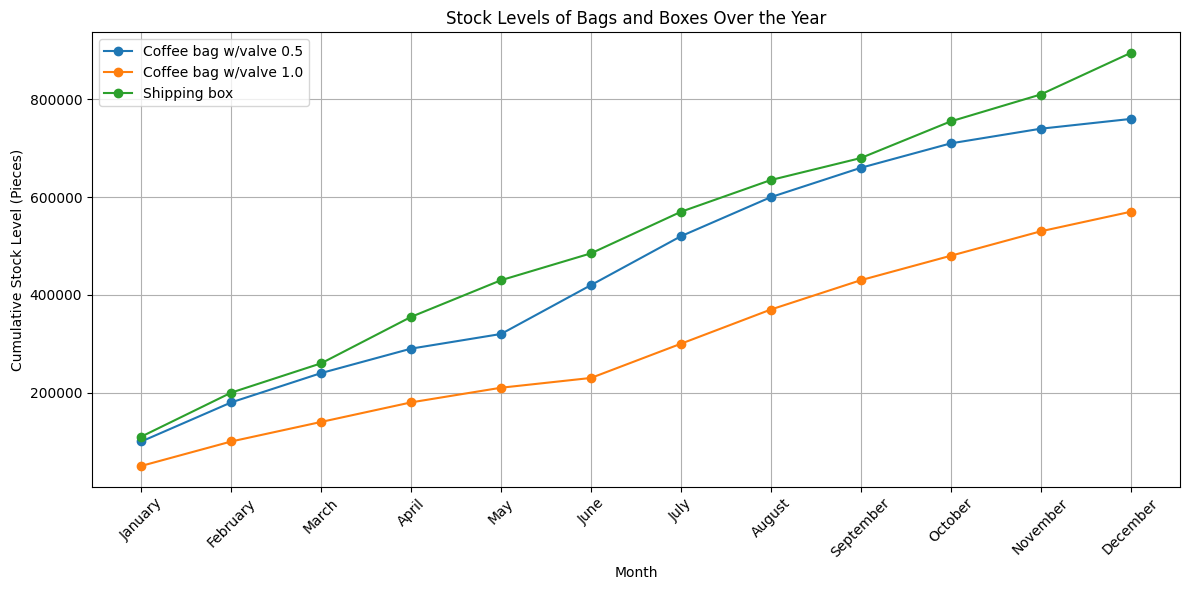

In [63]:
#BAGS/BOXES

import pandas as pd
import matplotlib.pyplot as plt

# Define the months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

# Data for Coffee bag w/valve 0.5
bag_0_5_data = {
    'Month': months,
    'NetQuantity': [
        100000,        # January
        80000,         # February
        60000,         # March
        50000,         # April
        30000,         # May
        110000 - 10000, # June (Adjustment: -10,000 DAM)
        100000,        # July
        80000,         # August
        60000,         # September
        50000,         # October
        30000,         # November
        20000          # December
    ]
}

# Data for Coffee bag w/valve 1.0
bag_1_0_data = {
    'Month': months,
    'NetQuantity': [
        50000,         # January
        50000,         # February
        40000,         # March
        40000,         # April
        30000,         # May
        20000,         # June
        70000,         # July
        70000,         # August
        60000,         # September
        50000,         # October
        50000,         # November
        40000          # December
    ]
}

# Data for Shipping box
box_data = {
    'Month': months,
    'NetQuantity': [
        110000,        # January
        90000,         # February
        65000 - 5000,   # March (Adjustment: -5,000 DAM)
        95000,         # April
        75000,         # May
        55000,         # June
        85000,         # July
        65000,         # August
        45000,         # September
        75000,         # October
        55000,         # November
        85000          # December
    ]
}

# Create DataFrames for each product
df_bag_0_5 = pd.DataFrame(bag_0_5_data)
df_bag_1_0 = pd.DataFrame(bag_1_0_data)
df_box = pd.DataFrame(box_data)

# Calculate cumulative stock levels
df_bag_0_5['StockLevel'] = df_bag_0_5['NetQuantity'].cumsum()
df_bag_1_0['StockLevel'] = df_bag_1_0['NetQuantity'].cumsum()
df_box['StockLevel'] = df_box['NetQuantity'].cumsum()

# Plot the stock levels
plt.figure(figsize=(12, 6))

plt.plot(df_bag_0_5['Month'], df_bag_0_5['StockLevel'], marker='o', label='Coffee bag w/valve 0.5')
plt.plot(df_bag_1_0['Month'], df_bag_1_0['StockLevel'], marker='o', label='Coffee bag w/valve 1.0')
plt.plot(df_box['Month'], df_box['StockLevel'], marker='o', label='Shipping box')

plt.xlabel('Month')
plt.ylabel('Cumulative Stock Level (Pieces)')
plt.title('Stock Levels of Bags and Boxes Over the Year')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


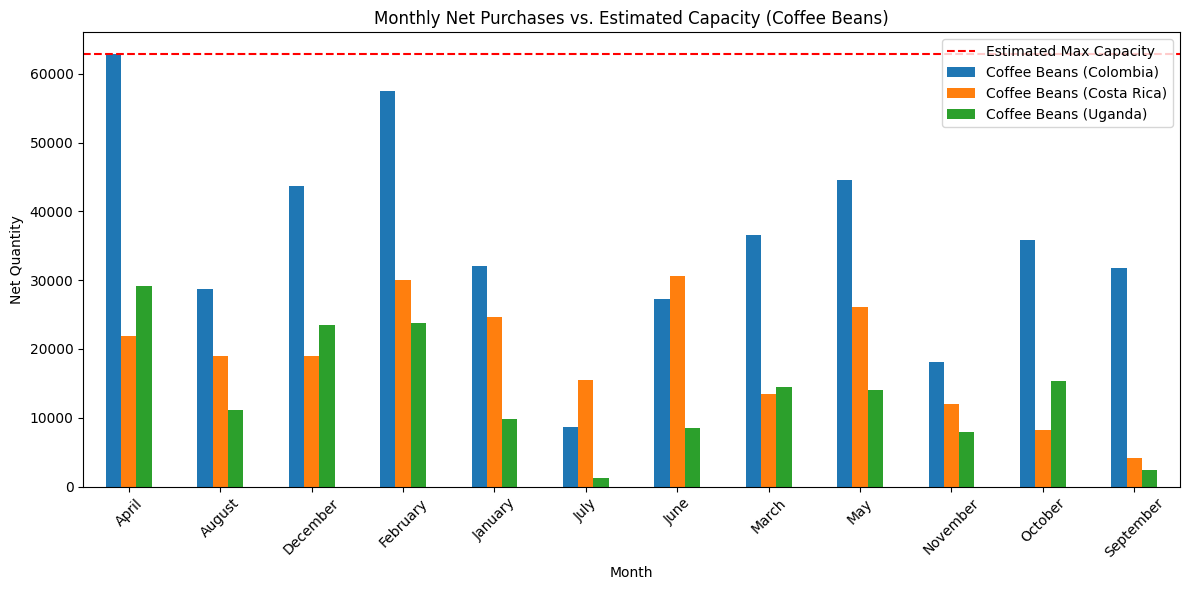

Estimated Maximum Capacity for Coffee Beans: 62871
Average Utilization for Coffee Beans (Costa Rica): 29.74%
Average Utilization for Coffee Beans (Uganda): 21.40%
Average Utilization for Coffee Beans (Colombia): 56.68%


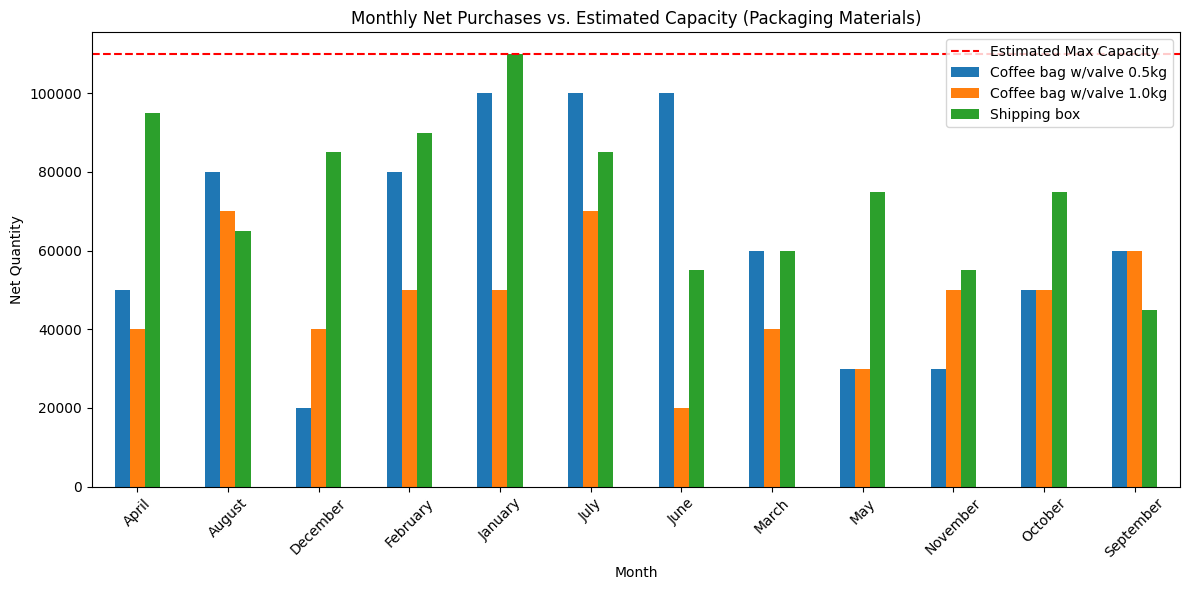

Estimated Maximum Capacity for Packaging Materials: 110000
Average Utilization for Coffee bag w/valve 0.5kg: 57.58%
Average Utilization for Coffee bag w/valve 1.0kg: 43.18%
Average Utilization for Shipping box: 67.80%


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

# Function to create a DataFrame from raw data
def create_df(product_name, quantities, adjustments):
    net_quantities = [q + adj for q, adj in zip(quantities, adjustments)]
    df = pd.DataFrame({
        'Month': months,
        'NetQuantity': net_quantities
    })
    df['Product'] = product_name
    return df

# Data for Coffee Beans (by origin)
data_beans = {
    'Costa Rica': {
        'Quantities': [24647, 30076, 13399, 21858, 26044, 30627, 
                       15548, 18910, 4194, 8192, 11928, 18949],
        'Adjustments': [0]*12  # No adjustments
    },
    'Uganda': {
        'Quantities': [9887, 23710, 14539, 29154, 17349, 8497, 
                       1226, 11126, 2477, 15276, 7993, 23547],
        'Adjustments': [0, 0, 0, 0, -3360, 0, 0, 0, 0, 0, 0, 0]  # Adjustment in May
    },
    'Colombia': {
        'Quantities': [32057, 57513, 36599, 62871, 46222, 27284, 
                       8629, 28697, 31765, 35901, 18094, 43694],
        'Adjustments': [0, 0, 0, 0, -1680, 0, 0, 0, 0, 0, 0, 0]  # Adjustment in May
    }
}

# Create DataFrames for coffee beans
df_beans_list = []
for origin, data in data_beans.items():
    df = create_df(f'Coffee Beans ({origin})', data['Quantities'], data['Adjustments'])
    df_beans_list.append(df)

# Combine all coffee beans into one DataFrame
df_beans = pd.concat(df_beans_list)

# Data for Coffee Bags and Shipping Boxes
data_products = {
    'Coffee bag w/valve 0.5kg': {
        'Quantities': [100000, 80000, 60000, 50000, 30000, 110000, 
                       100000, 80000, 60000, 50000, 30000, 20000],
        'Adjustments': [0, 0, 0, 0, 0, -10000, 0, 0, 0, 0, 0, 0]  # Adjustment in June
    },
    'Coffee bag w/valve 1.0kg': {
        'Quantities': [50000, 50000, 40000, 40000, 30000, 20000, 
                       70000, 70000, 60000, 50000, 50000, 40000],
        'Adjustments': [0]*12  # No adjustments
    },
    'Shipping box': {
        'Quantities': [110000, 90000, 65000, 95000, 75000, 55000, 
                       85000, 65000, 45000, 75000, 55000, 85000],
        'Adjustments': [0, 0, -5000, 0, 0, 0, 0, 0, 0, 0, 0, 0]  # Adjustment in March
    }
}

# Create DataFrames for products
df_products_list = []
for product_name, data in data_products.items():
    df = create_df(product_name, data['Quantities'], data['Adjustments'])
    df_products_list.append(df)

# Combine all products into one DataFrame
df_products = pd.concat(df_products_list)

# Function to plot capacity utilization
def plot_capacity_utilization(df, product_type):
    # Determine maximum capacity (assumed as the highest monthly net quantity)
    max_capacity = df['NetQuantity'].max()
    
    # Create pivot table for plotting
    pivot_df = df.pivot(index='Month', columns='Product', values='NetQuantity')
    products = df['Product'].unique()
    
    # Plotting
    pivot_df.plot(kind='bar', figsize=(12, 6))
    plt.axhline(y=max_capacity, color='r', linestyle='--', label='Estimated Max Capacity')
    plt.xlabel('Month')
    plt.ylabel('Net Quantity')
    plt.title(f'Monthly Net Purchases vs. Estimated Capacity ({product_type})')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print utilization
    print(f"Estimated Maximum Capacity for {product_type}: {max_capacity}")
    for product in products:
        avg_utilization = df[df['Product'] == product]['NetQuantity'].mean() / max_capacity * 100
        print(f"Average Utilization for {product}: {avg_utilization:.2f}%")

# Plot for Coffee Beans
plot_capacity_utilization(df_beans, 'Coffee Beans')

# Plot for Packaging Materials
plot_capacity_utilization(df_products, 'Packaging Materials')


C:\temp\ipykernel_2472\3419232468.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Month'] = pd.Categorical(product_df['Month'], categories=months_order, ordered=True)
C:\temp\ipykernel_2472\3419232468.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df['Month'] = pd.Categorical(product_df['Month'], categories=months_order, ordered=True)
C:\temp\ipykernel_2472\3419232468.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

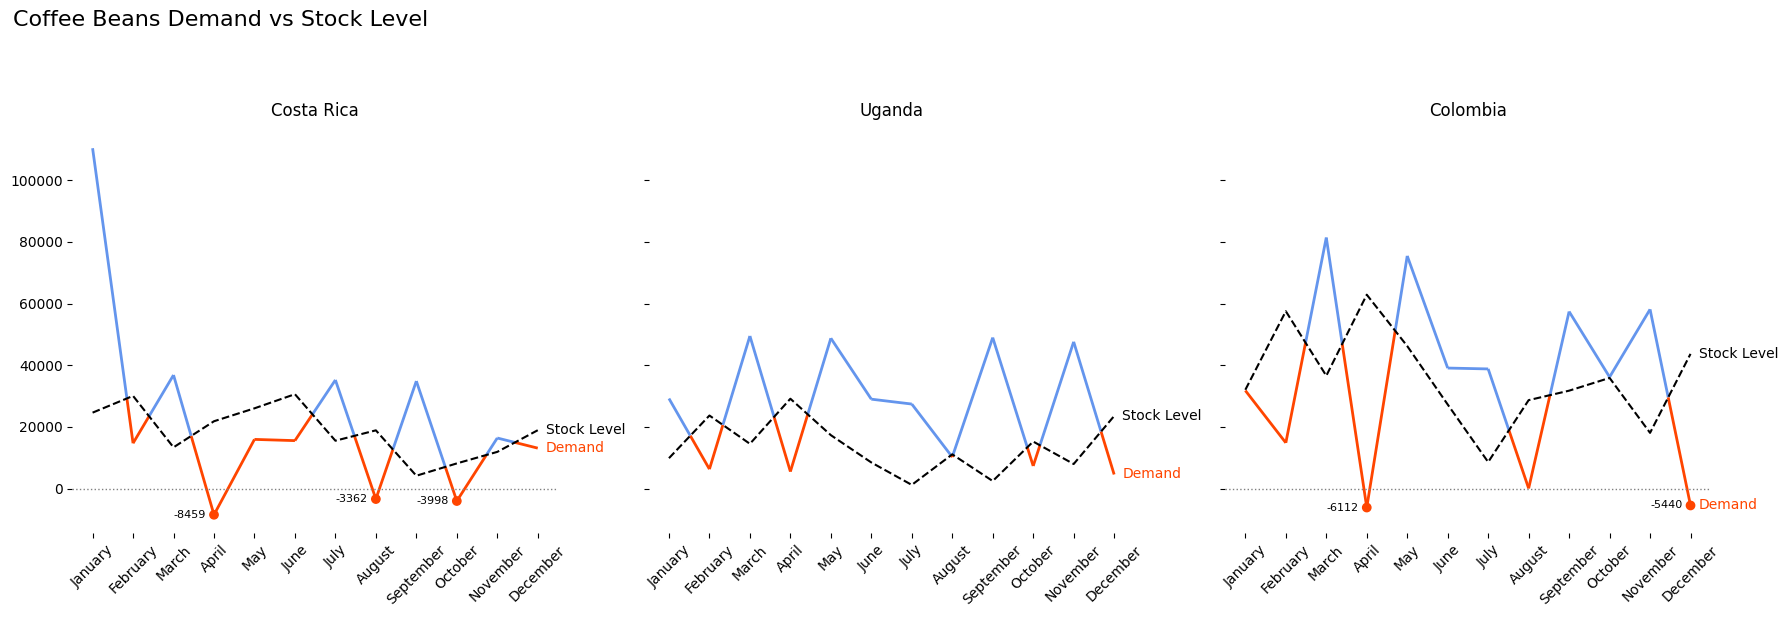

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import re
from io import StringIO

# Multiline string with your data
data = '''
Product\tSupplier\tMonth\tStock level\tUnit\tScrapped\tReasoncode\tUnit price\tStock value\tPurchased\tDemand
Coffee Beans (COO Costa Rica)\tOscar Amador\tJanuary\t24 647\tKg\t-\t\t€ 11,50\t€ 283 440,50\t20 160,00\t110353
Coffee Beans (COO Costa Rica)\tOscar Amador\tFebruary\t30 076\tKg\t-\t\t€ 11,50\t€ 345 874,00\t20 160,00\t14731
Coffee Beans (COO Costa Rica)\tOscar Amador\tMarch\t13 399\tKg\t-\t\t€ 11,50\t€ 154 088,50\t-\t36837
Coffee Beans (COO Costa Rica)\tOscar Amador\tApril\t21 858\tKg\t-\t\t€ 11,50\t€ 251 367,00\t20 160,00\t-8459
Coffee Beans (COO Costa Rica)\tOscar Amador\tMay\t26 044\tKg\t-\t\t€ 11,50\t€ 299 506,00\t20 160,00\t15974
Coffee Beans (COO Costa Rica)\tOscar Amador\tJune\t30 627\tKg\t-\t\t€ 11,50\t€ 352 210,50\t20 160,00\t15577
Coffee Beans (COO Costa Rica)\tOscar Amador\tJuly\t15 548\tKg\t-\t\t€ 11,50\t€ 178 802,00\t-\t35239
Coffee Beans (COO Costa Rica)\tOscar Amador\tAugust\t18 910\tKg\t-\t\t€ 11,50\t€ 217 465,00\t20 160,00\t-3362
Coffee Beans (COO Costa Rica)\tOscar Amador\tSeptember\t4 194\tKg\t-\t\t€ 11,50\t€ 48 231,00\t-\t34876
Coffee Beans (COO Costa Rica)\tOscar Amador\tOctober\t8 192\tKg\t-\t\t€ 11,50\t€ 94 208,00\t20 160,00\t-3998
Coffee Beans (COO Costa Rica)\tOscar Amador\tNovember\t11 928\tKg\t-\t\t€ 11,50\t€ 137 172,00\t20 160,00\t16424
Coffee Beans (COO Costa Rica)\tOscar Amador\tDecember\t18 949\tKg\t-\t\t€ 11,50\t€ 217 913,50\t20 160,00\t13139
Coffee Beans (COO Uganda)\tKabaka Obote\tJanuary\t9 887\tKg\t-\t\t€ 8,50\t€ 84 039,50\t20 160,00\t29222
Coffee Beans (COO Uganda)\tKabaka Obote\tFebruary\t23 710\tKg\t-\t\t€ 8,50\t€ 201 535,00\t40 320,00\t6337
Coffee Beans (COO Uganda)\tKabaka Obote\tMarch\t14 539\tKg\t-\t\t€ 8,50\t€ 123 581,50\t20 160,00\t49491
Coffee Beans (COO Uganda)\tKabaka Obote\tApril\t29 154\tKg\t-\t\t€ 8,50\t€ 247 809,00\t40 320,00\t5545
Coffee Beans (COO Uganda)\tKabaka Obote\tMay\t17 349\tKg\t-3 360\tEXP\t€ 8,50\t€ 147 466,50\t20 160,00\t48765
Coffee Beans (COO Uganda)\tKabaka Obote\tJune\t8 497\tKg\t-\t\t€ 8,50\t€ 72 224,50\t20 160,00\t29012
Coffee Beans (COO Uganda)\tKabaka Obote\tJuly\t1 226\tKg\t-\t\t€ 8,50\t€ 10 421,00\t20 160,00\t27431
Coffee Beans (COO Uganda)\tKabaka Obote\tAugust\t11 126\tKg\t-\t\t€ 8,50\t€ 94 571,00\t40 320,00\t10260
Coffee Beans (COO Uganda)\tKabaka Obote\tSeptember\t2 477\tKg\t-\t\t€ 8,50\t€ 21 054,50\t20 160,00\t48969
Coffee Beans (COO Uganda)\tKabaka Obote\tOctober\t15 276\tKg\t-\t\t€ 8,50\t€ 129 846,00\t40 320,00\t7361
Coffee Beans (COO Uganda)\tKabaka Obote\tNovember\t7 993\tKg\t-\t\t€ 8,50\t€ 67 940,50\t20 160,00\t47603
Coffee Beans (COO Uganda)\tKabaka Obote\tDecember\t23 547\tKg\t-\t\t€ 8,50\t€ 200 149,50\t40 320,00\t4606
Coffee Beans (COO Colombia)\tPablo Rodriguez\tJanuary\t32 057\tKg\t-\t\t€ 6,95\t€ 222 796,15\t40 320,00\t31810
Coffee Beans (COO Colombia)\tPablo Rodriguez\tFebruary\t57 513\tKg\t-\t\t€ 6,95\t€ 399 715,35\t60 480,00\t14864
Coffee Beans (COO Colombia)\tPablo Rodriguez\tMarch\t36 599\tKg\t-\t\t€ 6,95\t€ 254 363,05\t20 160,00\t81394
Coffee Beans (COO Colombia)\tPablo Rodriguez\tApril\t62 871\tKg\t-\t\t€ 6,95\t€ 436 953,45\t60 480,00\t-6112
Coffee Beans (COO Colombia)\tPablo Rodriguez\tMay\t46 222\tKg\t-1 680\tEXP\t€ 6,95\t€ 321 242,90\t20 160,00\t75449
Coffee Beans (COO Colombia)\tPablo Rodriguez\tJune\t27 284\tKg\t-\t\t€ 6,95\t€ 189 623,80\t20 160,00\t39098
Coffee Beans (COO Colombia)\tPablo Rodriguez\tJuly\t8 629\tKg\t-\t\t€ 6,95\t€ 59 971,55\t20 160,00\t38815
Coffee Beans (COO Colombia)\tPablo Rodriguez\tAugust\t28 697\tKg\t-\t\t€ 6,95\t€ 199 444,15\t60 480,00\t92
Coffee Beans (COO Colombia)\tPablo Rodriguez\tSeptember\t31 765\tKg\t-\t\t€ 6,95\t€ 220 766,75\t40 320,00\t57412
Coffee Beans (COO Colombia)\tPablo Rodriguez\tOctober\t35 901\tKg\t-\t\t€ 6,95\t€ 249 511,95\t40 320,00\t36184
Coffee Beans (COO Colombia)\tPablo Rodriguez\tNovember\t18 094\tKg\t-\t\t€ 6,95\t€ 125 753,30\t20 160,00\t58127
Coffee Beans (COO Colombia)\tPablo Rodriguez\tDecember\t43 694\tKg\t-\t\t€ 6,95\t€ 303 673,30\t60 480,00\t-5440
'''

# Read data into a DataFrame
df = pd.read_csv(StringIO(data), sep='\t', engine='python')

# Clean numeric columns
numeric_columns = ['Stock level', 'Scrapped', 'Unit price', 'Stock value', 'Purchased', 'Demand']
for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace(r'[^-\d.,]', '', regex=True)
    df[col] = df[col].str.replace(',', '.')
    df[col] = df[col].replace({'': '0', '-': '0'})  # Replace '-' with '0'
    df[col] = df[col].astype(float)

# Define the order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Function to plot the graph
def plot_demand_vs_stock(product_df, product_name, ax):
    # Sort data by months
    product_df['Month'] = pd.Categorical(product_df['Month'], categories=months_order, ordered=True)
    product_df = product_df.sort_values('Month')
    
    # Numeric values for x-axis
    x = np.arange(len(product_df))
    
    demand = product_df['Demand'].values
    stock_level = product_df['Stock level'].values
    
    # Initialize lists for line segments and their colors
    segments = []
    colors = []
    
    # Loop through each segment between data points
    for i in range(len(demand) - 1):
        x0, x1 = x[i], x[i+1]
        y0_demand, y1_demand = demand[i], demand[i+1]
        y0_stock, y1_stock = stock_level[i], stock_level[i+1]
        
        # Check if the demand and stock level lines cross
        if (y0_demand - y0_stock) * (y1_demand - y1_stock) >= 0:
            # No crossing; use one color for the segment
            segments.append([[x0, y0_demand], [x1, y1_demand]])
            color = 'cornflowerblue' if y0_demand >= y0_stock else 'orangered'
            colors.append(color)
        else:
            # Lines cross; calculate crossing point
            m_demand = (y1_demand - y0_demand) / (x1 - x0)
            m_stock = (y1_stock - y0_stock) / (x1 - x0)
            x_cross = x0 + (y0_stock - y0_demand) / (m_demand - m_stock)
            y_cross = m_demand * (x_cross - x0) + y0_demand
            
            # Segment before crossing
            segments.append([[x0, y0_demand], [x_cross, y_cross]])
            color = 'cornflowerblue' if y0_demand >= y0_stock else 'orangered'
            colors.append(color)
            
            # Segment after crossing
            segments.append([[x_cross, y_cross], [x1, y1_demand]])
            color = 'cornflowerblue' if y1_demand >= y1_stock else 'orangered'
            colors.append(color)
    
    # Create LineCollection with segments and colors
    lc = LineCollection(segments, colors=colors, linewidths=2)
    ax.add_collection(lc)
    
    # Plot stock level line
    ax.plot(x, stock_level, color='black', linestyle='--', label='Stock Level')
    
    # Plot zero line if Demand goes below zero
    if demand.min() < 0:
        ax.axhline(0, color='grey', linestyle=':', linewidth=1)
        # Mark points where Demand is negative
        negative_indices = np.where(demand < 0)[0]
        # Use dots with the same color as the line at that point
        dot_colors = ['cornflowerblue' if demand[idx] >= stock_level[idx] else 'orangered' for idx in negative_indices]
        ax.scatter(x[negative_indices], demand[negative_indices], color=dot_colors, marker='o')
        # Add text labels next to the points, shifted to the left
        for idx in negative_indices:
            ax.text(x[idx] - 0.2, demand[idx], f'{demand[idx]:.0f}', color='black', fontsize=8, ha='right', va='center')
    
    # Set x-axis
    ax.set_xticks(x)
    ax.set_xticklabels(product_df['Month'], rotation=45)
    
    # Extract country name from product_name
    match = re.search(r'\(COO (.+?)\)', product_name)
    if match:
        country_name = match.group(1)
    else:
        country_name = product_name  # Fallback to product_name if pattern doesn't match
    
    # Set the country name as the title above each subplot
    ax.set_title(country_name, fontsize=12, pad=10)
    
    # Remove axis labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    # Remove the frame around the plot
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    # Add labels to the end of each line
    ax.text(x[-1] + 0.2, demand[-1], 'Demand', va='center',
            color='cornflowerblue' if demand[-1] >= stock_level[-1] else 'orangered')
    ax.text(x[-1] + 0.2, stock_level[-1], 'Stock Level', va='center', color='black')
    
    # Adjust layout
    ax.set_xlim(-0.5, len(x) - 0.5)

# Filter data only for coffee beans
df_beans = df[df['Product'].str.contains('Coffee Beans')]

# Get the list of unique coffee bean products
products = df_beans['Product'].unique()

# Create a figure with 1 row and 3 columns for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot graphs for each type of coffee beans
for ax, product in zip(axes, products):
    product_df = df_beans[df_beans['Product'] == product]
    plot_demand_vs_stock(product_df, product, ax)

# Set the main title at the top-left corner
fig.suptitle('Coffee Beans Demand vs Stock Level', fontsize=16, x=0.01, y=1.02, ha='left')

# Adjust the layout to make room for the main title
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
